In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import datasets, neighbors
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [2]:
data = pd.read_csv('/Users/cenkerarin/ml_test/datasets/breast-cancer.csv')

In [3]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


<Axes: xlabel='diagnosis', ylabel='count'>

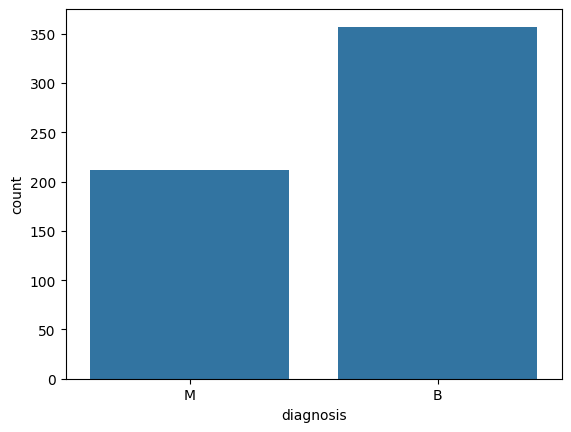

In [4]:
sns.countplot(x='diagnosis', data=data)

In [5]:
data['diagnosis'] = (data['diagnosis'] == 'M').astype(int)

In [6]:
X = data.drop(['diagnosis', 'id'], axis=1)
y = data['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.naive_bayes import GaussianNB


sk_model = GaussianNB()
sk_model.fit(X_train,y_train)
sk_predictions = sk_model.predict(X_test) 

In [8]:
accuracy = accuracy_score(y_test, sk_predictions)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.9737


---

In [ ]:
class NaiveBayes:
    def __init__(self):
        self.class_priors = {}
        self.feature_stats = {}
        self.classes = None
    
    def fit(self, X, y):
        """
        Naive Bayes fitter
        """
        self.classes = np.unique(y)
        n_samples = len(y)
        
        for class_val in self.classes:
            self.class_priors[class_val] = np.sum(y == class_val) / n_samples
        
        self.feature_stats = {}
        for class_val in self.classes:
            class_mask = (y == class_val)
            X_class = X[class_mask]
            
            # Gaussian Naive Bayes için
            self.feature_stats[class_val] = {
                'mean': np.mean(X_class, axis=0),
                'var': np.var(X_class, axis=0)
            }
    
    def _gaussian_pdf(self, x, mean, var):
        """
        Gaussian olasılık yoğunluk fonksiyonunu hesapla
        """
        # Sıfıra bölünmeyi önlemek için epsilon
        epsilon = 1e-9
        var = var + epsilon
        
        coefficient = 1 / np.sqrt(2 * np.pi * var)
        exponent = -((x - mean) ** 2) / (2 * var)
        return coefficient * np.exp(exponent)
    
    def predict_proba(self, X):
        """
        Örnekler için sınıf olasılıklarını tahmin et
        
        Args:
            X: Test özellikleri (DataFrame veya array)
            
        Returns:
            Her sınıf için olasılık dizisi
        """
        n_samples = len(X)
        n_classes = len(self.classes)
        probabilities = np.zeros((n_samples, n_classes))
        
        for i, class_val in enumerate(self.classes):
            class_prob = np.log(self.class_priors[class_val])
            
            mean = self.feature_stats[class_val]['mean']
            var = self.feature_stats[class_val]['var']
            
            log_likelihood = np.sum(
                np.log(self._gaussian_pdf(X, mean, var)), axis=1
            )
            
            probabilities[:, i] = class_prob + log_likelihood
        

        probabilities = probabilities - np.max(probabilities, axis=1, keepdims=True)
        probabilities = np.exp(probabilities)
        
        # normalizasyon
        probabilities = probabilities / np.sum(probabilities, axis=1, keepdims=True)
        
        return probabilities
    
    def predict(self, X):
        """
        Örnekler için sınıf etiketlerini tahmin et
        
        Args:
            X: Test özellikleri (DataFrame veya array)
            
        Returns:
            Tahmin edilen sınıf etiketleri dizisi
        """
        probabilities = self.predict_proba(X)
        return self.classes[np.argmax(probabilities, axis=1)]


custom_nb = NaiveBayes()
custom_nb.fit(X_train.values, y_train.values)

custom_predictions = custom_nb.predict(X_test.values)

custom_accuracy = accuracy_score(y_test, custom_predictions)
print(f"Özel Naive Bayes Doğruluğu: {custom_accuracy:.4f}")

# Sklearn modeli ile karşılaştıralım
print(f"Sklearn Naive Bayes Doğruluğu: {accuracy:.4f}")
print(f"Fark: {abs(custom_accuracy - accuracy):.6f}")


Özel Naive Bayes Doğruluğu: 0.9649
Sklearn Naive Bayes Doğruluğu: 0.9737
Fark: 0.008772
